In [1]:
import numpy as np
import scipy.io.wavfile as wav
import FFT
import matplotlib.pyplot as plt

In [2]:
fs, audio = wav.read('sinal_1.wav')  

if audio.dtype != np.float32:
    audio = audio / np.iinfo(audio.dtype).max

print(audio)

[0.83921569 0.72156863 0.51372549 ... 0.36862745 0.42745098 0.60784314]


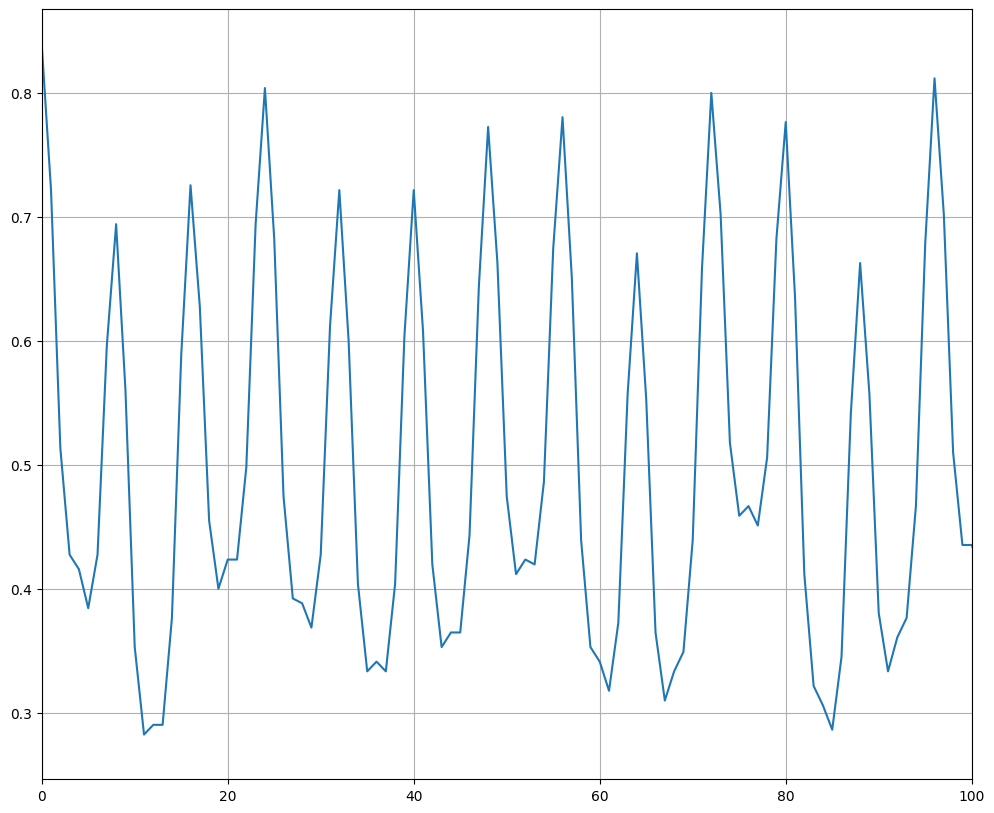

In [3]:
plt.figure(figsize=(12,10))
plt.plot(audio)
plt.xlim(0,100)
plt.grid(True)

## FFT

In [4]:
fft = FFT.fft_completa(audio)
freq = FFT.frequencia(fs, fft)

fft = fft[0:len(fft)//2]

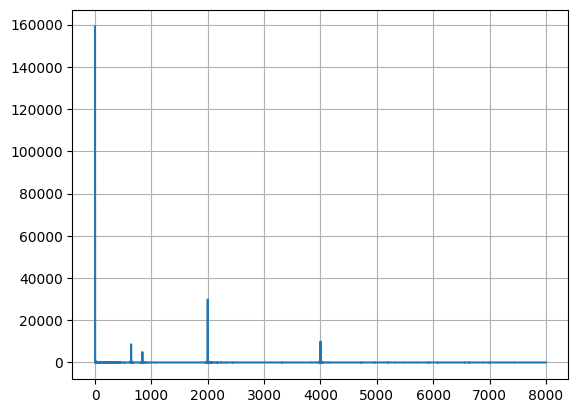

In [5]:
plt.plot(freq,np.abs(fft))
plt.grid(True)

## FIR TIPO 1

[1. 1. 1. 1. 1.]


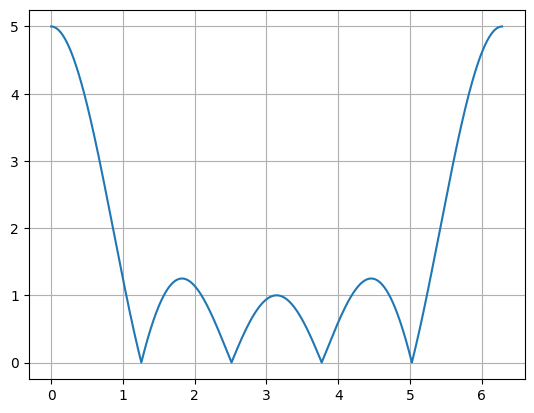

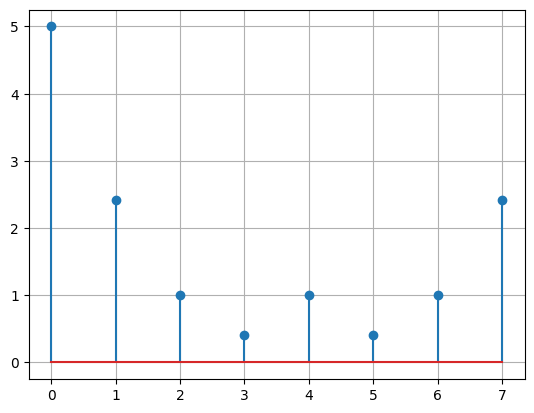

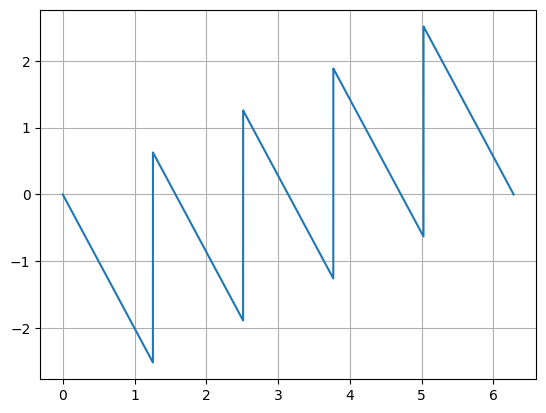

In [6]:
M = 4

h = np.ones(M+1)
h[M//2+1::] = h[0:M//2][::-1]
print(h)

omega = np.linspace(0, 2*np.pi, 10000)
soma = 0

for l in range(M//2 + 1):
    if (l == 0):
        soma = soma + h[M//2]*np.cos(omega*l)
    else:
        soma = soma + 2*h[M//2 - l]*np.cos(omega*l) 

H = np.exp(-1j*omega*M/2)*soma

plt.plot(omega,abs(H))
plt.grid()
plt.show()

fft = FFT.fft_completa(h)
plt.stem(abs(fft))
plt.grid()
plt.show()

plt.plot(omega,np.angle(H))
plt.grid()

## FIR Tipo 2

[1. 1. 1. 1. 1. 1.]
1
2
3


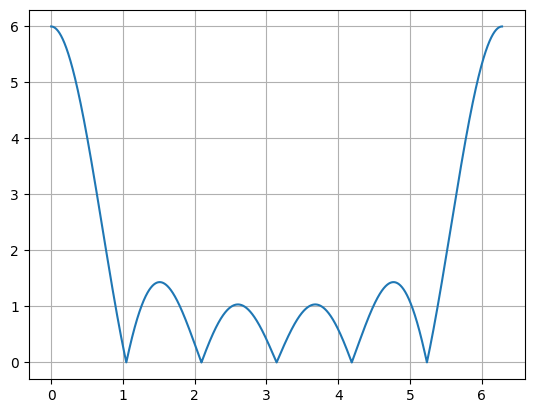

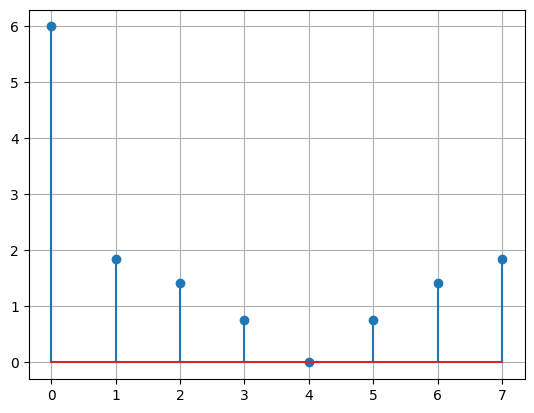

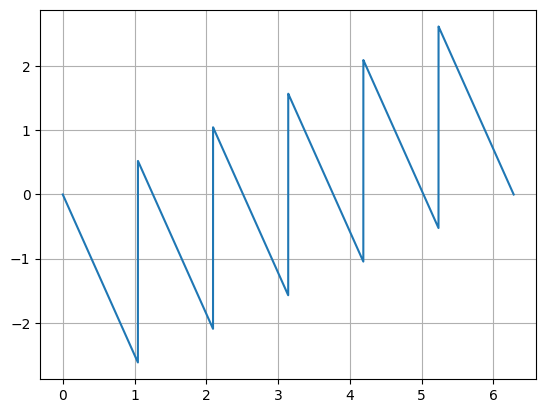

In [7]:
M = 5

h = np.ones(M+1)
h[(M+1)//2::] = h[0:(M+1)//2][::-1]
print(h)

omega = np.linspace(0, 2*np.pi, 10000)
soma = 0
for l in range(1,(M+1)//2 + 1):
    soma = soma + 2*h[(M+1)//2 - l]*np.cos(omega*(l-0.5))
    print(l)

H = np.exp(-1j*omega*M/2)*soma

plt.plot(omega,abs(H))
plt.grid()
plt.show()

fft = FFT.fft_completa(h)
plt.stem(abs(fft))
plt.grid()
plt.show()

plt.plot(omega,np.angle(H))
plt.grid()

## FIR Tipo 3

[ 1.  0. -1.]


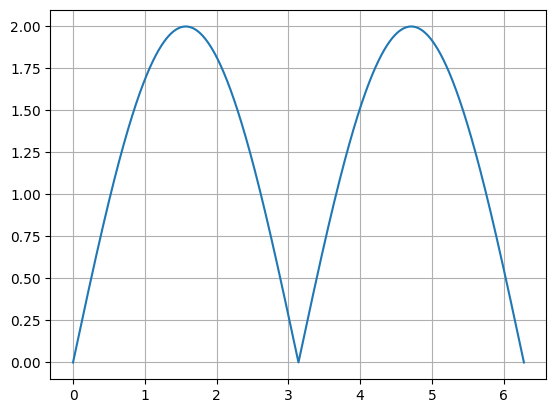

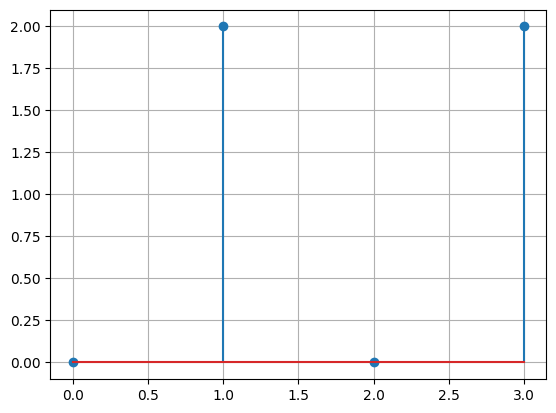

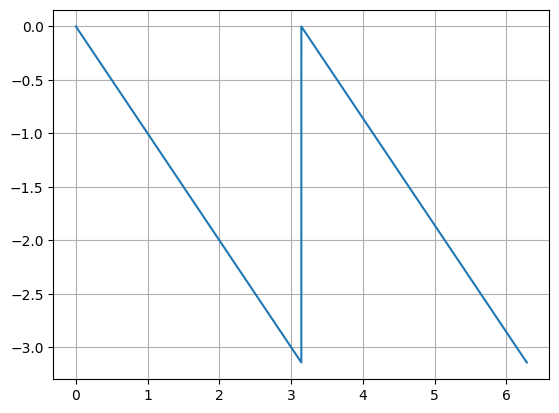

In [8]:
M = 2

h = np.ones(M+1)
h[M//2] = 0
h[M//2+1::] = -1*h[0:M//2][::-1]
print(h)

omega = np.linspace(0, 2*np.pi, 10000)
soma = 0
for l in range(1,M//2 + 1):
    soma = soma + 2*h[(M)//2 - l]*np.sin(omega*l)

H = np.exp(-1j*omega*M/2)*soma

plt.plot(omega,abs(H))
plt.grid()
plt.show()

fft = FFT.fft_completa(h)
plt.stem(abs(fft))
plt.grid()
plt.show()

plt.plot(omega,np.angle(H))
plt.grid()

## FIR Tipo 4

[ 1.  1.  1. -1. -1. -1.]


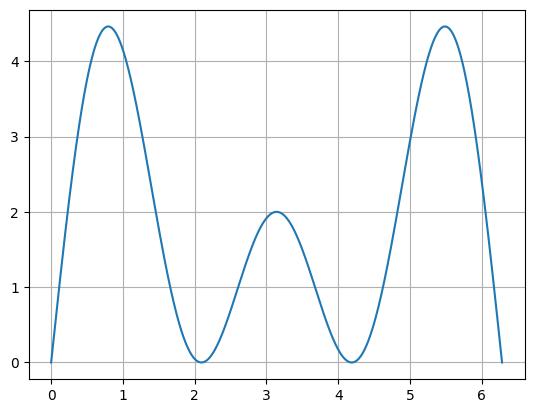

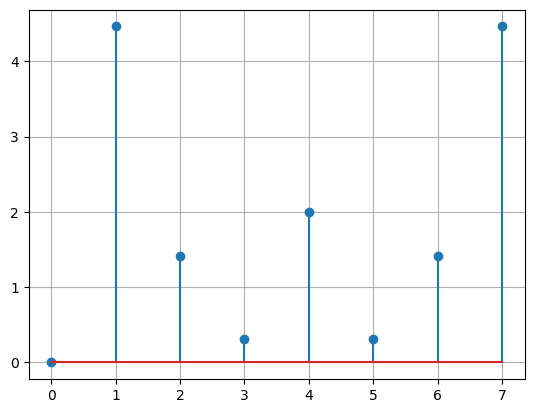

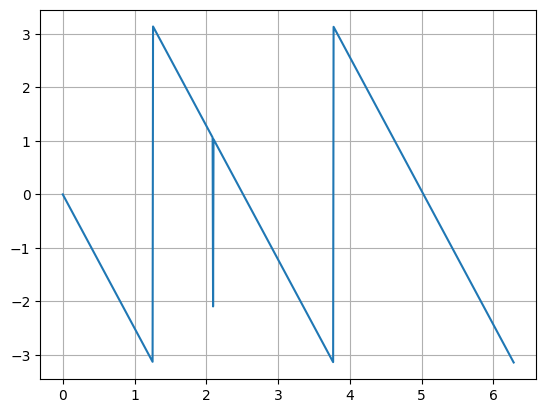

In [9]:
M = 5

h = np.ones(M+1)
h[(M+1)//2::] = -1*h[0:(M+1)//2][::-1]
print(h)

omega = np.linspace(0, 2*np.pi, 1000)
soma = 0
for l in range(1,(M+1)//2 + 1):
    soma = soma + 2*h[(M+1)//2 - l]*np.sin(omega*(l-0.5))

H = np.exp(-1j*omega*M/2)*soma
plt.plot(omega,abs(H))
plt.grid()
plt.show()

fft = FFT.fft_completa(h)
plt.stem(abs(fft))
plt.grid()
plt.show()

plt.plot(omega,np.angle(H))
plt.grid()

In [10]:
def lowpass_tipo1(fc,fs,M):
    n = np.arange(M+1) - M/2 #simetria

    # impulso ideal low-pass
    h = np.zeros(M+1)
    h = np.sin(2*np.pi*(fc/fs)*n) / (np.pi*n)
    h[M//2] = 2*fc/fs

    omega = np.linspace(0, 2*np.pi, 10000)
    soma = 0

    for l in range(M//2 + 1):
        if (l == 0):
            soma = soma + h[M//2]*np.cos(omega*l)
        else:
            soma = soma + 2*h[M//2 - l]*np.cos(omega*l) 

    H = np.exp(-1j*omega*M/2)*soma
    f = FFT.frequencia(fs,H)

    return h, H, f

def bandpass_tipo1(fc1,fc2,fs,M):
    h1, H1, f1 = lowpass_tipo1(fc1,fs,M)
    h2, H2, _ = lowpass_tipo1(fc2,fs,M)

    h = h2 - h1
    H = H2 - H1
    f = f1
    return h, H, f



C:\Users\gson5\AppData\Local\Temp\ipykernel_23752\3233092652.py:6: RuntimeWarning: invalid value encountered in divide
  h = np.sin(2*np.pi*(fc/fs)*n) / (np.pi*n)


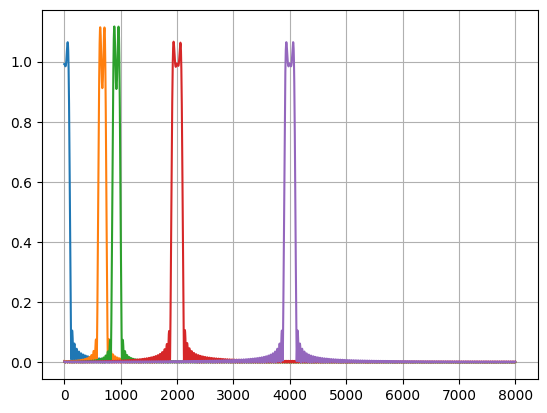

In [11]:
h_cos1,H_cos1,f1 = lowpass_tipo1(100,16000,400)
h_cos2,H_cos2,f2 = bandpass_tipo1(600,750,16000,400)
h_cos3,H_cos3,f3 = bandpass_tipo1(850,1000,16000,400)
h_cos4,H_cos4,f4 = bandpass_tipo1(1900,2100,16000,400)
h_cos5,H_cos5,f5 = bandpass_tipo1(3900,4100,16000,400)

plt.plot(f1, np.abs(H_cos1[0:len(H_cos1)//2]))
plt.plot(f2, np.abs(H_cos2[0:len(H_cos1)//2]))
plt.plot(f3, np.abs(H_cos3[0:len(H_cos1)//2]))
plt.plot(f4, np.abs(H_cos4[0:len(H_cos1)//2]))
plt.plot(f5, np.abs(H_cos5[0:len(H_cos1)//2]))

plt.grid()

In [12]:
cos1 = FFT.convolucao(h_cos1, audio)
cos2 = FFT.convolucao(h_cos2, audio)
cos3 = FFT.convolucao(h_cos3, audio)
cos4 = FFT.convolucao(h_cos4, audio)
cos5 = FFT.convolucao(h_cos5, audio)

C:\Users\gson5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\gson5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


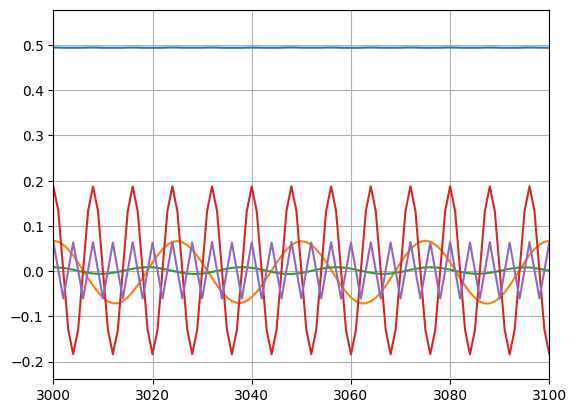

In [13]:
for i in range(5):
    cos_wave = globals()[f'cos{i+1}']
    plt.plot(cos_wave)
plt.xlim(3000,3100)
plt.grid()


In [14]:
for i in range(5):
    cos_wave = globals()[f"cos{i+1}"]  # pega a variável pelo nome
    audio = np.int16(cos_wave / np.max(np.abs(cos_wave)) * 32767)
    wav.write(f'audio{i+1}.wav', fs, audio) 


C:\Users\gson5\AppData\Local\Temp\ipykernel_23752\4094852842.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  audio = np.int16(cos_wave / np.max(np.abs(cos_wave)) * 32767)


In [15]:
comparar = (cos1+cos2+cos3+cos4+cos5)
audio = np.int16(comparar / np.max(np.abs(comparar)) * 32767)
wav.write('audio_comparacao.wav', fs, audio) 

C:\Users\gson5\AppData\Local\Temp\ipykernel_23752\2771311753.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  audio = np.int16(comparar / np.max(np.abs(comparar)) * 32767)
